# Решение для интернет-магазина «В один клик»

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.

Нашему отделу поручили разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

# Как решать задачу

1. Нужно промаркировать уровень финансовой активности постоянных покупателей. В компании принято выделять два уровня активности: «снизилась», если клиент стал покупать меньше товаров, и «прежний уровень».


2. Нужно собрать данные по клиентам по следующим группам:
    - Признаки, которые описывают коммуникацию сотрудников компании с клиентом.
    - Признаки, которые описывают продуктовое поведение покупателя. Например, какие товары покупает и как часто.
    - Признаки, которые описывают покупательское поведение клиента. Например, сколько тратил в магазине.
    - Признаки, которые описывают поведение покупателя на сайте. Например, как много страниц просматривает и сколько времени проводит на сайте.


1. Нужно построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.
2. В исследование нужно включить дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца.
3. Используя данные модели и данные о прибыльности клиентов, нужно выделить сегменты покупателей и разработать для них персонализированные предложения.

# Описание данных
***market_file.csv***

Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.
- id — номер покупателя в корпоративной базе данных.
- Покупательская активность — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
- Тип сервиса — уровень сервиса, например «премиум» и «стандарт». Зависит от наличия определенной подписки у пользователя.
- Разрешить сообщать — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
- Маркет_актив_6_мес — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
- Маркет_актив_тек_мес — количество маркетинговых коммуникаций в текущем месяце.
- Длительность — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
- Акционные_покупки — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
- Популярная_категория — самая популярная категория товаров у покупателя за последние 6 месяцев.
- Средний_просмотр_категорий_за_визит — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
- Неоплаченные_продукты_штук_квартал — общее число неоплаченных товаров в корзине за последние 3 месяца.
- Ошибка_сервиса — число сбоев, которые коснулись покупателя во время посещения сайта за последние 3 месяца.
- Страниц_за_визит — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.


***market_money.csv***

Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.
- id — номер покупателя в корпоративной базе данных.
- Период — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
- Выручка — сумма выручки за период в условных единицах.


***market_time.csv***

Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.
- id — номер покупателя в корпоративной базе данных.
- Период — название периода, во время которого зафиксировано общее время.
- минут — значение времени, проведённого на сайте, в минутах.

***money.csv***

Таблица с данными о среднемесячной прибыли продавца за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.
- id — номер покупателя в корпоративной базе данных.
- значение прибыли в условных единицах.

# Задачи исследования

[***Шаг 1. Загрузка данных***](#step1)

[***Шаг 2. Предобработка данных***](#step2)

[***Шаг 3. Исследовательский анализ данных***](#step3)

[***Шаг 4. Объединение таблиц***](#step4)

[***Шаг 5. Корреляционный анализ***](#step5)

[***Шаг 6. Использование пайплайнов***](#step6)

[***Шаг 7. Анализ важности признаков***](#step7)

[***Шаг 8. Сегментация покупателей***](#step8)

[***Шаг 9. Общий вывод***](#step9)

## Загрузка данных
<a id='step1'></a> ***Шаг 1. Загрузка данных***

Импортируем нужные библиотеки

In [270]:
#библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from time import time
from statsmodels.tools.tools import add_constant

#Инструменты для моделирования и предобработки
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler,
    MinMaxScaler
)
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

#Модели машинного обучения
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#Метрики и анализ
from sklearn.metrics import roc_auc_score, make_scorer
from sklearn.inspection import permutation_importance
import shap


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

Сохраняем датафреймы и выводим первые строки каждого набора данных. Так же изучаем общую информацию.

In [271]:
market_file = pd.read_csv('market_file.csv')
market_money = pd.read_csv('market_money.csv')
market_time = pd.read_csv('market_time.csv')
money = pd.read_csv('money.csv')

In [272]:
print("Первые строки market_file:")
display(market_file.head())
print("Информация о market_file:")
display(market_file.info())

Первые строки market_file:


,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


Информация о market_file:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошиб

None

- Сразу можно сказать, что у нас нет пропущенных значений. 
- Наш целевой признак - покупательская активность. В нем есть два класса (снизилась и прежний уровень). 
- В типе сервиса видно, что стандартт написан с двумя Т, это может быть опечатка, проверим это позже
- Все типы данных верные 

In [273]:
print("Первые строки market_money:")
display(market_money.head())
print("Информация о market_money:")
display(market_money.info())

Первые строки market_money:


,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


Информация о market_money:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


None

- Сразу можно сказать, что у нас нет пропущенных значений. 
- Все типы данных верные 

In [274]:
print("Первые строки market_time:")
display(market_time.head())
print("Информация о market_time:")
display(market_time.info())

Первые строки market_time:


,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


Информация о market_time:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


None

- Сразу можно сказать, что у нас нет пропущенных значений. 
- Бросается в глаза опечатка "предыдцщий_месяц"
- Все типы данных верные 

In [275]:
print("Первые строки money:")
display(money.head())
print("Информация о money:")
display(money.info())

Первые строки money:


,id;Прибыль
215348;0,98.0
215349;4,16.0
215350;3,13.0
215351;4,87.0
215352;4,21.0


Информация о money:
<class 'pandas.core.frame.DataFrame'>
Index: 1300 entries, 215348;0 to 216647;3
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id;Прибыль  1284 non-null   float64
dtypes: float64(1)
memory usage: 20.3+ KB


None

- сразу видно, что у нас проблема с табуляцией, перезагурзим таблицу.


In [276]:
money = pd.read_csv('money.csv', sep=';',decimal = ',')
print("Первые строки money:")
display(money.head())
print("Информация о money:")
display(money.info())

Первые строки money:


,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


Информация о money:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


None

- Сразу можно сказать, что у нас нет пропущенных значений. 

## Предобработка данных

<a id='step2'></a> ***Шаг 2. Предобработка данных***

- Начнем с market_file. 

Хочется посмотреть уникальные значения для каждого категориального столбца. 

In [277]:
for col in ['Покупательская активность','Тип сервиса', 'Разрешить сообщать', 'Популярная_категория']:
    print(f'\nУникальные значения в столбце "{col}":')
    print(market_file[col].unique())


Уникальные значения в столбце "Покупательская активность":
['Снизилась' 'Прежний уровень']

Уникальные значения в столбце "Тип сервиса":
['премиум' 'стандартт' 'стандарт']

Уникальные значения в столбце "Разрешить сообщать":
['да' 'нет']

Уникальные значения в столбце "Популярная_категория":
['Товары для детей' 'Домашний текстиль' 'Косметика и аксесуары'
 'Техника для красоты и здоровья' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника']


Все хорошо, кроме столбца Тип сервиса. Исправим опечатку 'стандартт'

In [278]:
market_file['Тип сервиса'] = market_file['Тип сервиса'].replace('стандартт', 'стандарт')

Теперь проверим на явные дубликаты. 

In [279]:
market_file.duplicated().sum()

0

- Теперь перейдем к таблице market_money. 

Проверим уникальность Периода. 

In [280]:
market_money['Период'].unique()

array(['препредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц'],
      dtype=object)

Теперь проверим на явные дубликаты. 

In [281]:
market_money.duplicated().sum()

0

- Теперь перейдем к таблице market_time. 

Проверим уникальность Периода. 

In [282]:
market_time['Период'].unique()

array(['текущий_месяц', 'предыдцщий_месяц'], dtype=object)

Исправим опечатку. 

In [283]:
market_time['Период'] = market_time['Период'].replace('предыдцщий_месяц', 'предыдущий_месяц')

Теперь проверим на явные дубликаты. 

In [284]:
market_time.duplicated().sum()

0

- Теперь перейдем к таблице money. 

In [285]:
money.duplicated().sum()

0

Теперь приведем данные к змеиному виду

In [286]:
def to_snake_case(df):
    df.columns = (
        df.columns
        .str.strip()
        .str.replace(' ', '_')
        .str.lower()
    )
    return df

# Список всех датафреймов, к которым нужно применить преобразование
dataframes = [money, market_time, market_file,market_money]

# Применяем преобразование к каждому датафрейму и выводим результат
for i, df in enumerate(dataframes, start=1):
    df = to_snake_case(df)
    print(f"\n Названия столбцов после преобразования в таблице №{i}:")
    print(df.columns.tolist())


 Названия столбцов после преобразования в таблице №1:
['id', 'прибыль']

 Названия столбцов после преобразования в таблице №2:
['id', 'период', 'минут']

 Названия столбцов после преобразования в таблице №3:
['id', 'покупательская_активность', 'тип_сервиса', 'разрешить_сообщать', 'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'акционные_покупки', 'популярная_категория', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит']

 Названия столбцов после преобразования в таблице №4:
['id', 'период', 'выручка']


Выводы: 

Исправили опечатки, явных дубликатов нигде нет, привели данные к змеиному типу. 

## Исследовательский анализ данных 

<a id='step3'></a> ***Шаг 3. Исследовательский анализ данных***

Начнем с таблицы market_file.csv. 

In [287]:
print("Первые строки market_file:")
display(market_file.head())

Первые строки market_file:


,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


In [288]:
market_file['id'].duplicated().sum() #Тут проверяем на всякий случай дубликаты в id

0

In [289]:
market_file['покупательская_активность'].value_counts()

покупательская_активность
Прежний уровень    802
Снизилась          498
Name: count, dtype: int64

Примерно 62% клиентов сохранили уровень активности, 38% — снизили.

In [290]:
for col in ['тип_сервиса', 'разрешить_сообщать', 'популярная_категория']:
    print(f'\n{col}:')
    print(market_file[col].value_counts())


тип_сервиса:
тип_сервиса
стандарт    924
премиум     376
Name: count, dtype: int64

разрешить_сообщать:
разрешить_сообщать
да     962
нет    338
Name: count, dtype: int64

популярная_категория:
популярная_категория
Товары для детей                        330
Домашний текстиль                       251
Косметика и аксесуары                   223
Техника для красоты и здоровья          184
Мелкая бытовая техника и электроника    174
Кухонная посуда                         138
Name: count, dtype: int64


Большинство клиентов пользуются стандартным сервисом (около 71%),
а премиум — около 29%.


Примерно 74% клиентов разрешили коммуникации,
а 26% — отказались.

лидирует сегмент детских товаров (около 25%),
далее — товары для дома и косметика.

In [291]:
market_file.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1300.0,215997.500000,375.421985,215348.0,215672.75,215997.50,216322.25,216647.00
маркет_актив_6_мес,1300.0,4.253769,1.014814,0.9,3.70,4.20,4.90,6.60
маркет_актив_тек_мес,1300.0,4.011538,0.696868,3.0,4.00,4.00,4.00,5.00
длительность,1300.0,601.898462,249.856289,110.0,405.50,606.00,806.00,1079.00
акционные_покупки,1300.0,0.319808,0.249843,0.0,0.17,0.24,0.30,0.99
средний_просмотр_категорий_за_визит,1300.0,3.270000,1.355350,1.0,2.00,3.00,4.00,6.00
неоплаченные_продукты_штук_квартал,1300.0,2.840000,1.971451,0.0,1.00,3.00,4.00,10.00
ошибка_сервиса,1300.0,4.185385,1.955298,0.0,3.00,4.00,6.00,9.00
страниц_за_визит,1300.0,8.176923,3.978126,1.0,5.00,8.00,11.00,20.00


- Таблица содержит 1300 клиентов
- У большинства клиентов около 4 касаний в месяц
- Средняя доля покупок по акциям — около 32%.
- В среднем пользователь просматривает 3 категории за визит
- У большинства 1–3 неоплаченных товара. Есть клиенты с 8–10, что может быть выбросом. 
- Среднее количество сбоев около 4

Дискретные признаки: ['маркет_актив_тек_мес', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса']
Непрерывные признаки: ['маркет_актив_6_мес', 'длительность', 'акционные_покупки', 'страниц_за_визит']


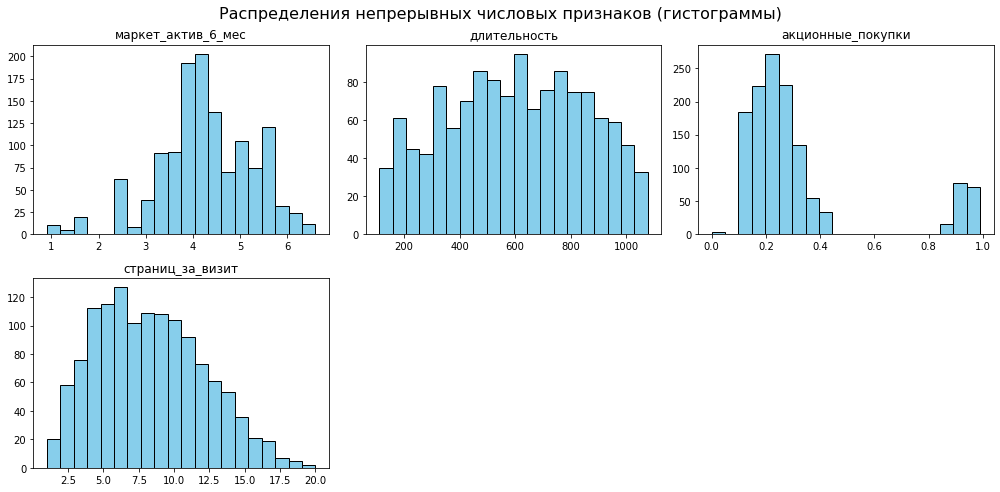

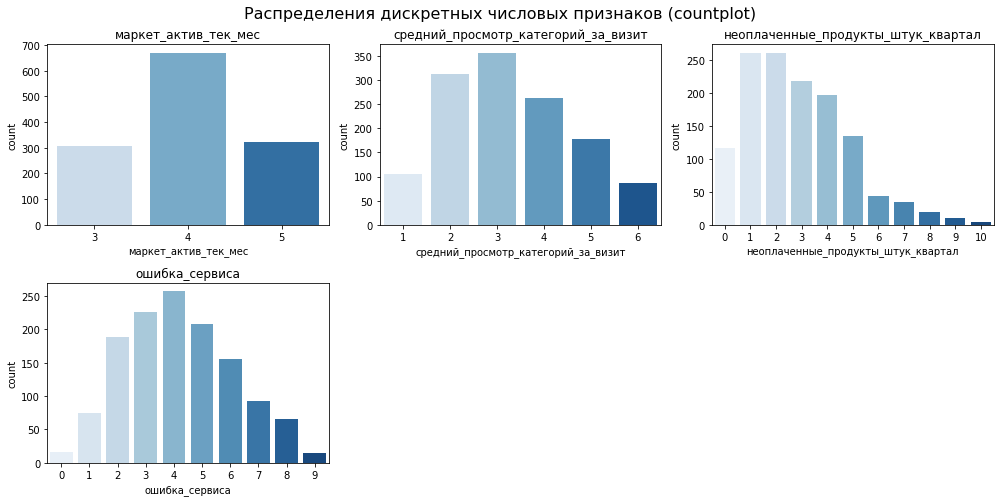

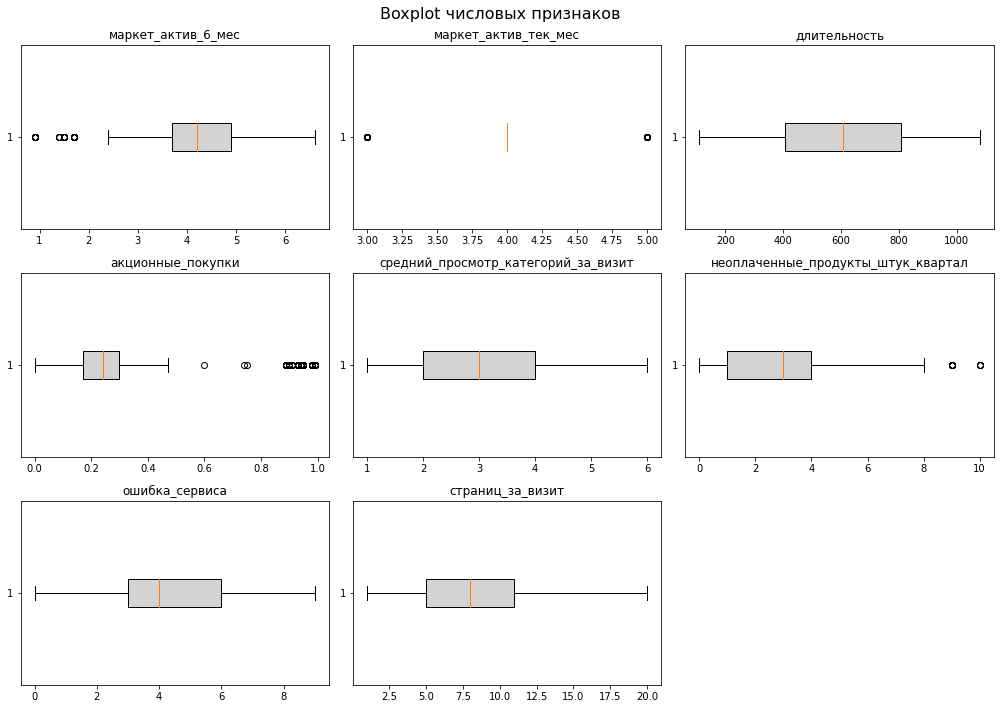

In [292]:
#признаки
num_cols = [
    'маркет_актив_6_мес',
    'маркет_актив_тек_мес',
    'длительность',
    'акционные_покупки',
    'средний_просмотр_категорий_за_визит',
    'неоплаченные_продукты_штук_квартал',
    'ошибка_сервиса',
    'страниц_за_визит'
]

#Разделим признаки на непрерывные и дискретные
discrete_cols = [col for col in num_cols if market_file[col].nunique() < 15]
continuous_cols = [col for col in num_cols if market_file[col].nunique() >= 15]

print("Дискретные признаки:", discrete_cols)
print("Непрерывные признаки:", continuous_cols)

#Визуализация непрерывных признаков
plt.figure(figsize=(14, 10))
for i, col in enumerate(continuous_cols, 1):
    plt.subplot(3, 3, i)
    plt.hist(market_file[col].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title(col)
plt.suptitle('Распределения непрерывных числовых признаков (гистограммы)', fontsize=16)
plt.tight_layout()
plt.show()

# Визуализация дискретных признаков
plt.figure(figsize=(14, 10))
for i, col in enumerate(discrete_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=market_file[col], palette='Blues')
    plt.title(col)
plt.suptitle('Распределения дискретных числовых признаков (countplot)', fontsize=16)
plt.tight_layout()
plt.show()

#Boxplot для всех числовых признаков
plt.figure(figsize=(14, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    plt.boxplot(market_file[col].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='lightgray'))
    plt.title(col)
plt.suptitle('Boxplot числовых признаков', fontsize=16)
plt.tight_layout()
plt.show()


Для анализа количественных данных признаки были разделены на непрерывные и дискретные:

- Непрерывные признаки визуализированы с помощью гистограмм, что позволило оценить форму распределения, наличие скошенности и потенциальных выбросов.

- Дискретные признаки проанализированы через countplot, так как они содержат ограниченное количество уникальных значений, и гистограмма в данном случае могла бы искажать восприятие.

Основные наблюдения:

- Большинство непрерывных признаков (например, длительность, страниц_за_визит) имеют распределение, близкое к нормальному, но с небольшой правосторонней асимметрией, что говорит о наличии клиентов с экстремально высокими значениями.

- По признакам акционные_покупки и неоплаченные_продукты_штук_квартал видна скошенность вправо — часть пользователей практически не совершает акционные покупки или не имеет неоплаченных товаров.

- Среди дискретных переменных наиболее часто встречаются значения 4–5 в показателях маркет_актив_тек_мес и ошибка_сервиса, что может указывать на устойчивый уровень вовлечённости и стабильность пользовательских взаимодействий.

- Boxplot показали наличие отдельных выбросов по признакам маркет_актив_6_мес, неоплаченные_продукты_штук_квартал и акционные_покупки, что важно учитывать при масштабировании и отборе признаков для моделирования.

Вывод:
Данные содержат как скошенные, так и выбросные распределения, поэтому на этапе предобработки будет целесообразно использовать робастное масштабирование или MinMaxScaler. Разделение признаков на дискретные и непрерывные позволило точнее оценить их поведение и потенциальное влияние на целевой показатель.

Проведён анализ распределений числовых признаков.
Большинство признаков имеют асимметричные распределения и содержат отдельные выбросы.
Это указывает на неоднородность клиентской базы — присутствуют как малоактивные, так и высоко вовлечённые пользователи.
Признаки Акционные_покупки, Ошибка_сервиса и Страниц_за_визит обладают высокой вариативностью и могут оказаться значимыми при прогнозировании покупательской активности.

In [293]:
outliers_summary = []

for col in num_cols:
    Q1 = market_file[col].quantile(0.25)
    Q3 = market_file[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = ((market_file[col] < lower) | (market_file[col] > upper)).sum()
    perc = outliers / market_file.shape[0] * 100

    outliers_summary.append([col, outliers, round(perc, 2), lower, upper])

outliers_df = pd.DataFrame(outliers_summary, columns=['признак', 'кол-во_выбросов', '%_от_выборки', 'нижняя_граница', 'верхняя_граница'])
display(outliers_df)

,признак,кол-во_выбросов,%_от_выборки,нижняя_граница,верхняя_граница
0,маркет_актив_6_мес,36,2.77,1.900,6.700
1,маркет_актив_тек_мес,631,48.54,4.000,4.000
2,длительность,0,0.00,-195.250,1406.750
3,акционные_покупки,168,12.92,-0.025,0.495
4,средний_просмотр_категорий_за_визит,0,0.00,-1.000,7.000
5,неоплаченные_продукты_штук_квартал,14,1.08,-3.500,8.500
6,ошибка_сервиса,0,0.00,-1.500,10.500
7,страниц_за_визит,0,0.00,-4.000,20.000


Посмотрим на выбросы акционных покупок. 

In [294]:
market_file[market_file['акционные_покупки'] > 0.5]

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2
14,215362,Снизилась,премиум,да,4.2,4,438,0.74,Домашний текстиль,3,4,6,4
16,215364,Снизилась,премиум,да,4.3,4,708,0.98,Домашний текстиль,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,216602,Прежний уровень,стандарт,нет,3.4,5,170,0.95,Техника для красоты и здоровья,4,1,3,10
1256,216604,Прежний уровень,стандарт,да,4.9,5,350,0.99,Домашний текстиль,3,4,5,5
1257,216605,Прежний уровень,стандарт,да,3.2,4,568,0.94,Мелкая бытовая техника и электроника,5,1,7,11
1292,216640,Прежний уровень,стандарт,нет,5.7,4,416,0.95,Кухонная посуда,2,3,5,13


Я не вижу в этом ничего странного, многие люди покупают вещи только на скидках, поэтому зачищать не будем. 

Посмотрим на выбросы неоплаченных покупок. 

In [295]:
market_file[market_file['неоплаченные_продукты_штук_квартал'] > 8]

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
72,215420,Снизилась,стандарт,да,3.5,5,449,0.35,Домашний текстиль,1,9,2,2
73,215421,Снизилась,премиум,нет,4.0,5,523,0.94,Техника для красоты и здоровья,1,10,7,5
117,215465,Снизилась,стандарт,да,3.5,5,449,0.28,Домашний текстиль,1,9,2,2
118,215466,Снизилась,премиум,нет,2.4,5,523,0.30,Техника для красоты и здоровья,1,10,1,4
176,215524,Снизилась,стандарт,да,3.0,3,474,0.23,Техника для красоты и здоровья,1,10,4,2
186,215534,Снизилась,премиум,нет,4.0,4,419,0.93,Товары для детей,1,9,3,3
204,215552,Снизилась,стандарт,да,0.9,4,624,0.89,Косметика и аксесуары,1,9,5,1
216,215564,Снизилась,стандарт,нет,3.9,3,618,0.24,Техника для красоты и здоровья,2,10,3,5
246,215594,Снизилась,стандарт,да,4.2,4,627,0.90,Товары для детей,6,9,5,8
251,215599,Снизилась,стандарт,да,3.4,4,716,0.28,Домашний текстиль,2,9,4,6


Максимум неоплаченных в корзине товаров - 10.  В этом тоже нет ничего странного, люди добавляют в корзину, а потом забывают. Оставим все как есть 

Теперь самое сложное - Маркет_актив_6_мес и Маркет_актив_тек_мес. 
За 6 месяцев видно, что есть клиенты на которых много распространялось маркетинговой активности, а есть для которых мало. Это вполне нормально, поэтому не будем ничего делать с этими даннными. 
И активность за месяц тоже оставим. 

- Теперь изучим таблицу market_money.csv

In [296]:
print("Первые строки market_money:")
display(market_money.head())

Первые строки market_money:


,id,период,выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


In [297]:
money_pivot = market_money.pivot(index='id', columns='период', values='выручка')

# Переименуем колонки для удобства
money_pivot = money_pivot.rename(columns={
    'препредыдущий_месяц': 'выручка_препредыдущий',
    'предыдущий_месяц': 'выручка_предыдущий',
    'текущий_месяц': 'выручка_текущий'
})

# Рассчитаем изменения
money_pivot['Δ_1'] = money_pivot['выручка_предыдущий'] - money_pivot['выручка_препредыдущий']
money_pivot['Δ_2'] = money_pivot['выручка_текущий'] - money_pivot['выручка_предыдущий']

display(money_pivot.head())


период,выручка_предыдущий,выручка_препредыдущий,выручка_текущий,Δ_1,Δ_2
id,,,,,
215348,0.0,0.0,3293.1,0.0,3293.1
215349,5216.0,4472.0,4971.6,744.0,-244.4
215350,5457.5,4826.0,5058.4,631.5,-399.1
215351,6158.0,4793.0,6610.4,1365.0,452.4
215352,5807.5,4594.0,5872.5,1213.5,65.0


In [298]:
increase = (money_pivot['Δ_2'] > 0).mean() * 100
decrease = (money_pivot['Δ_2'] < 0).mean() * 100
print(f'Рост выручки у {increase:.1f}% клиентов, падение — у {decrease:.1f}%')

Рост выручки у 73.2% клиентов, падение — у 26.6%


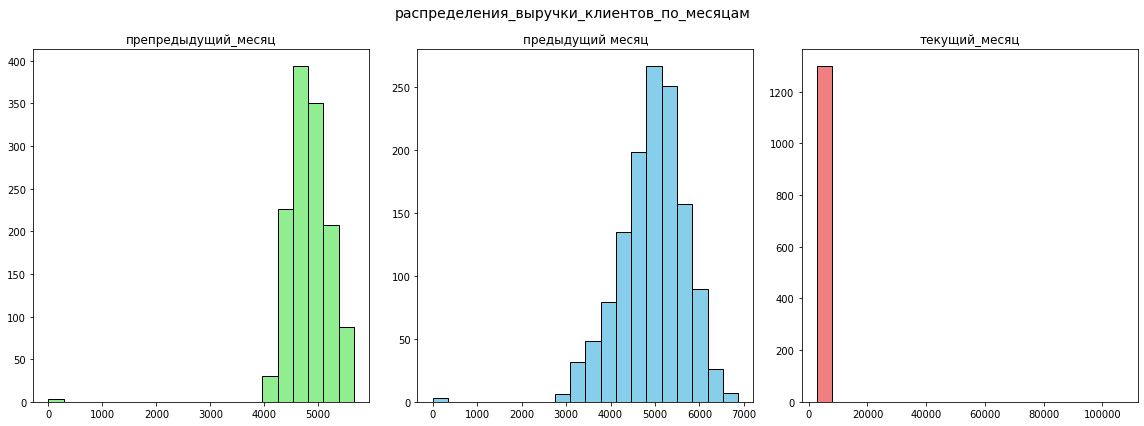

In [299]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 3, 1)
plt.hist(money_pivot['выручка_препредыдущий'], bins=20, color='lightgreen', edgecolor='black')
plt.title('препредыдущий_месяц')

plt.subplot(1, 3, 2)
plt.hist(money_pivot['выручка_предыдущий'], bins=20, color='skyblue', edgecolor='black')
plt.title('предыдущий месяц')

plt.subplot(1, 3, 3)
plt.hist(money_pivot['выручка_текущий'], bins=20, color='lightcoral', edgecolor='black')
plt.title('текущий_месяц')

plt.suptitle('распределения_выручки_клиентов_по_месяцам', fontsize=14)
plt.tight_layout()
plt.show()


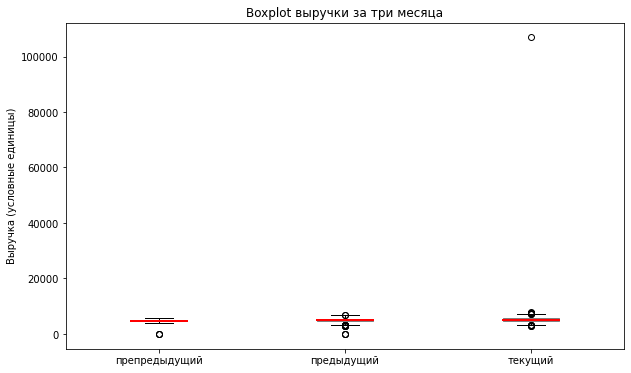

In [300]:
plt.figure(figsize=(10, 6))
plt.boxplot(
    [
        money_pivot['выручка_препредыдущий'],
        money_pivot['выручка_предыдущий'],
        money_pivot['выручка_текущий']
    ],
    labels=['препредыдущий', 'предыдущий', 'текущий'],
    patch_artist=True,
    boxprops=dict(facecolor='lightblue', color='gray'),
    medianprops=dict(color='red', linewidth=2)
)
plt.title('Boxplot выручки за три месяца')
plt.ylabel('Выручка (условные единицы)')
plt.show()


в текущем месяце есть явный выброс, который все портит, посмотрим на него 

In [301]:
money_pivot[money_pivot['выручка_текущий'] > 90000]

период,выручка_предыдущий,выручка_препредыдущий,выручка_текущий,Δ_1,Δ_2
id,,,,,
215380,6077.0,5051.0,106862.2,1026.0,100785.2


Я думаю, что эту строчку стоит удалить, потому что это явно выброс .

In [302]:
money_pivot = money_pivot.drop(index=215380)

И теперь посмотрим на графики заново. 

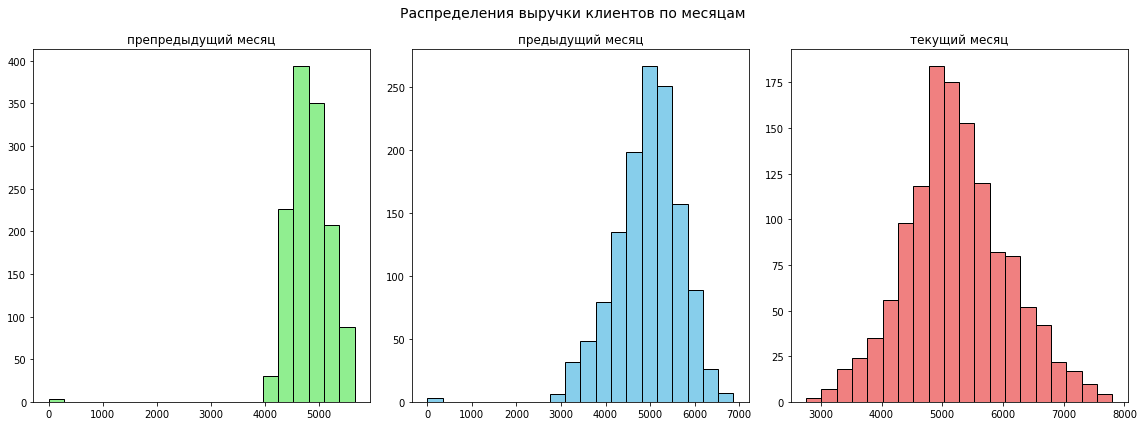

In [303]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 3, 1)
plt.hist(money_pivot['выручка_препредыдущий'], bins=20, color='lightgreen', edgecolor='black')
plt.title('препредыдущий месяц')

plt.subplot(1, 3, 2)
plt.hist(money_pivot['выручка_предыдущий'], bins=20, color='skyblue', edgecolor='black')
plt.title('предыдущий месяц')

plt.subplot(1, 3, 3)
plt.hist(money_pivot['выручка_текущий'], bins=20, color='lightcoral', edgecolor='black')
plt.title('текущий месяц')

plt.suptitle('Распределения выручки клиентов по месяцам', fontsize=14)
plt.tight_layout()
plt.show()


После удаления выброса динамика выручки выглядит реалистично.
Наблюдается рост от препредыдущего к предыдущему месяцу,
и небольшое снижение в текущем — что согласуется с тенденцией “снижения покупательской активности”.

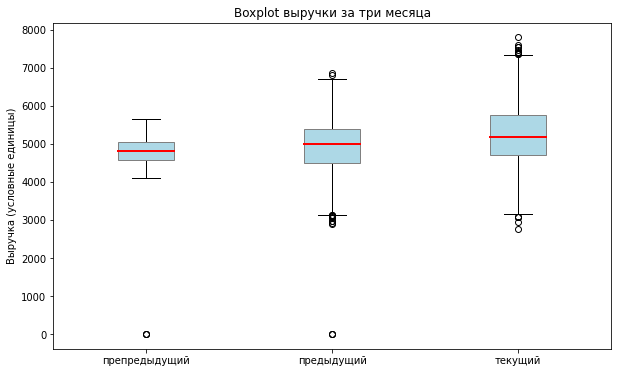

In [304]:
plt.figure(figsize=(10, 6))
plt.boxplot(
    [
        money_pivot['выручка_препредыдущий'],
        money_pivot['выручка_предыдущий'],
        money_pivot['выручка_текущий']
    ],
    labels=['препредыдущий', 'предыдущий', 'текущий'],
    patch_artist=True,
    boxprops=dict(facecolor='lightblue', color='gray'),
    medianprops=dict(color='red', linewidth=2)
)
plt.title('Boxplot выручки за три месяца')
plt.ylabel('Выручка (условные единицы)')
plt.show()


Теперь все стало сильно лучше. 

Распределение выручки стабильное, без искажений.
Медианная выручка достигает пика в предыдущем месяце,
после чего наблюдается небольшое снижение в текущем периоде.
Разброс значений остаётся примерно одинаковым, что говорит о сохранении структуры клиентской базы.

- Изучим market_time.csv

In [305]:
print("Первые строки market_time:")
display(market_time.head())

Первые строки market_time:


,id,период,минут
0,215348,текущий_месяц,14
1,215348,предыдущий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдущий_месяц,12
4,215350,текущий_месяц,13


In [306]:
market_time.describe()

,id,минут
count,2600.000000,2600.000000
mean,215997.500000,13.336154
std,375.349754,4.080198
min,215348.000000,4.000000
25%,215672.750000,10.000000
50%,215997.500000,13.000000
75%,216322.250000,16.000000
max,216647.000000,23.000000


- Большинство клиентов проводят от 10 до 16 минут на сайте в месяц.
- Есть небольшая группа “слабововлечённых” пользователей (около 25%), которые проводят на сайте менее 10 минут
- Верхние 25% (проводят 16–23 мин) — это самая вовлечённая аудитория

In [307]:
# Строим сводную таблицу по двум периодам
time_pivot = market_time.pivot(index='id', columns='период', values='минут')

# Переименуем для удобства
time_pivot = time_pivot.rename(columns={
    'предыдущий_месяц': 'минут_предыдущий',
    'текущий_месяц': 'минут_текущий'
})

# Рассчитаем изменение времени между месяцами
time_pivot['Δ'] = time_pivot['минут_текущий'] - time_pivot['минут_предыдущий']

display(time_pivot.head())


период,минут_предыдущий,минут_текущий,Δ
id,,,
215348,13,14,1
215349,12,10,-2
215350,8,13,5
215351,11,13,2
215352,8,11,3


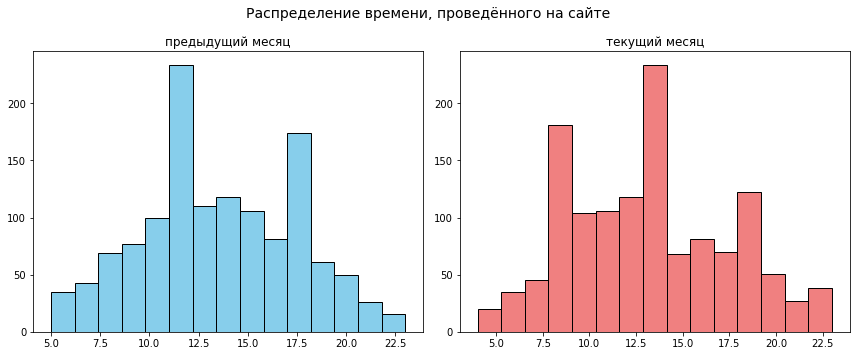

In [308]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(time_pivot['минут_предыдущий'], bins=15, color='skyblue', edgecolor='black')
plt.title('предыдущий месяц')

plt.subplot(1, 2, 2)
plt.hist(time_pivot['минут_текущий'], bins=15, color='lightcoral', edgecolor='black')
plt.title('текущий месяц')

plt.suptitle('Распределение времени, проведённого на сайте', fontsize=14)
plt.tight_layout()
plt.show()


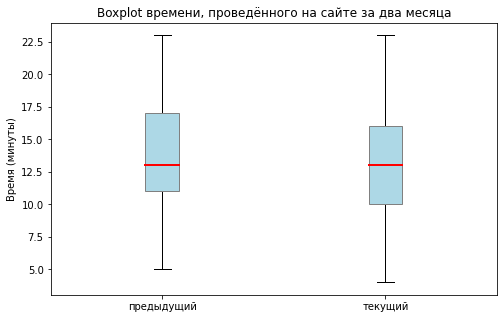

In [309]:
plt.figure(figsize=(8, 5))
plt.boxplot(
    [time_pivot['минут_предыдущий'], time_pivot['минут_текущий']],
    labels=['предыдущий', 'текущий'],
    patch_artist=True,
    boxprops=dict(facecolor='lightblue', color='gray'),
    medianprops=dict(color='red', linewidth=2)
)
plt.title('Boxplot времени, проведённого на сайте за два месяца')
plt.ylabel('Время (минуты)')
plt.show()

Анализ таблицы market_time показал, что среднее время, проведённое пользователями на сайте, остаётся стабильным и составляет около 13 минут в месяц.
При этом в текущем месяце наблюдается незначительное снижение медианного значения по сравнению с предыдущим (примерно на 1–2 минуты).
Распределение времени посещений остаётся однородным, без значительных выбросов, что говорит о стабильном поведении основной аудитории.

- Изучим money.csv

In [310]:
print("Первые строки money.csv:")
display(money.head())

Первые строки money.csv:


,id,прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


In [311]:
money.describe()

,id,прибыль
count,1300.000000,1300.000000
mean,215997.500000,3.996631
std,375.421985,1.013722
min,215348.000000,0.860000
25%,215672.750000,3.300000
50%,215997.500000,4.045000
75%,216322.250000,4.670000
max,216647.000000,7.430000


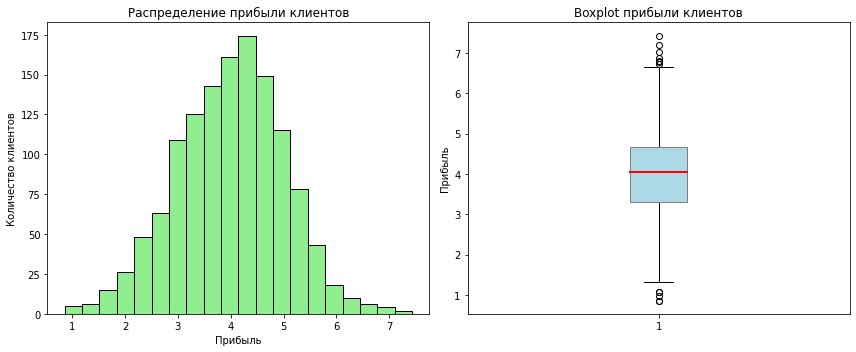

In [312]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Гистограмма
plt.subplot(1, 2, 1)
plt.hist(money['прибыль'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Распределение прибыли клиентов')
plt.xlabel('Прибыль')
plt.ylabel('Количество клиентов')

# Boxplot
plt.subplot(1, 2, 2)
plt.boxplot(money['прибыль'], vert=True, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='gray'),
            medianprops=dict(color='red', linewidth=2))
plt.title('Boxplot прибыли клиентов')
plt.ylabel('Прибыль')

plt.tight_layout()
plt.show()


Анализ таблицы money.csv показал, что распределение прибыли клиентов близко к нормальному, с медианой около 4 единиц.
Основная масса клиентов приносит прибыль в диапазоне от 3 до 5 единиц, что указывает на равномерную структуру доходов компании.
Небольшая доля покупателей (около 5%) демонстрирует значительно более высокие показатели прибыли — они могут быть отнесены к премиум-сегменту.

Теперь отберем клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период

In [313]:
#Преобразуем market_money в широкий формат
money_pivot = market_money.pivot(
    index='id',
    columns='период',
    values='выручка'
).fillna(0)


#Переименуем столбцы для удобства
money_pivot = money_pivot.rename(columns={
    'препредыдущий_месяц': 'выручка_препредыдущий',
    'предыдущий_месяц': 'выручка_предыдущий',
    'текущий_месяц': 'выручка_текущий'
})

#Отбираем только активных клиентов (во всех 3 месяцах выручка > 0)
active_clients = money_pivot[
    (money_pivot['выручка_препредыдущий'] > 0) &
    (money_pivot['выручка_предыдущий'] > 0) &
    (money_pivot['выручка_текущий'] > 0)
].index

#Удаляем неактивных клиентов из исходной таблицы
market_money = market_money[market_money['id'].isin(active_clients)]

print(f'Количество активных клиентов, оставшихся в выборке: {len(active_clients)} из {money_pivot.shape[0]}')
display(market_money.head())


Количество активных клиентов, оставшихся в выборке: 1297 из 1300


,id,период,выручка
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6
5,215349,предыдущий_месяц,5216.0
6,215350,препредыдущий_месяц,4826.0
7,215350,текущий_месяц,5058.4


Выводы: 
- Данные по всем источникам очищены и готовы для объединения.

- Основные показатели (время на сайте, выручка, прибыль, маркетинговая активность) имеют адекватные распределения без существенных искажений.

- Наблюдается небольшое снижение вовлечённости и выручки в текущем месяце, что подтверждает целевое состояние «покупательская активность снизилась».

- Итоговая выборка содержит только активных клиентов, что обеспечивает чистоту данных и релевантность для дальнейшего моделирования.

## Объединение таблиц

<a id='step4'></a> ***Шаг 4. Объединение таблиц***

4.1 Объедините таблицы market_file.csv, market_money.csv, market_time.csv. Данные о прибыли из файла money.csv при моделировании вам не понадобятся. 


4.2 Учитывайте, что данные о выручке и времени на сайте находятся в одном столбце для всех периодов. В итоговой таблице сделайте отдельный столбец для каждого периода.

In [314]:
#Создадим сводную таблицу по выручке
money_pivot = market_money.pivot(
    index='id',
    columns='период',
    values='выручка'
).rename(columns={
    'текущий_месяц': 'выручка_текущий',
    'предыдущий_месяц': 'выручка_предыдущий',
    'препредыдущий_месяц': 'выручка_препредыдущий'
}).reset_index()

#Создадим сводную таблицу по времени (минутам)
time_pivot = market_time.pivot(
    index='id',
    columns='период',
    values='минут'
).rename(columns={
    'текущий_месяц': 'минут_текущий',
    'предыдущий_месяц': 'минут_предыдущий',
    'препредыдущий_месяц': 'минут_препредыдущий'
}).reset_index()

#Объединим market_file с таблицей по выручке
merged = market_file.merge(money_pivot, on='id', how='left')

# Добавим данные о времени
merged = merged.merge(time_pivot, on='id', how='left')

#Проверим итоговую таблицу
print('Размер итоговой таблицы:', merged.shape)
display(merged.head())


Размер итоговой таблицы: (1300, 18)


,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_предыдущий,выручка_препредыдущий,выручка_текущий,минут_предыдущий,минут_текущий
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5,NaN,NaN,NaN,13,14
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11


Проверим пропуски

In [315]:
merged.isna().sum()

id                                     0
покупательская_активность              0
тип_сервиса                            0
разрешить_сообщать                     0
маркет_актив_6_мес                     0
маркет_актив_тек_мес                   0
длительность                           0
акционные_покупки                      0
популярная_категория                   0
средний_просмотр_категорий_за_визит    0
неоплаченные_продукты_штук_квартал     0
ошибка_сервиса                         0
страниц_за_визит                       0
выручка_предыдущий                     3
выручка_препредыдущий                  3
выручка_текущий                        3
минут_предыдущий                       0
минут_текущий                          0
dtype: int64

Пропусков не очень много, предлагаю их просто удалить 

In [316]:
merged = merged.dropna()

Выводы: 

После очистки данных и отбора активных клиентов выполнено объединение таблиц market_file, market_money и market_time.
В результирующем датафрейме каждая строка соответствует отдельному клиенту и содержит:

- основные характеристики покупателя

- показатели выручки за три последовательных месяца

- данные о времени, проведённом на сайте за те же периоды.

Таким образом, получен финальный датасет, готовый для построения модели прогнозирования покупательской активности.

## Корреляционный анализ

<a id='step5'></a> ***Шаг 5. Корреляционный анализ***

Количественные признаки для анализа:
['id', 'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'акционные_покупки', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит', 'выручка_предыдущий', 'выручка_препредыдущий', 'выручка_текущий', 'минут_предыдущий', 'минут_текущий']


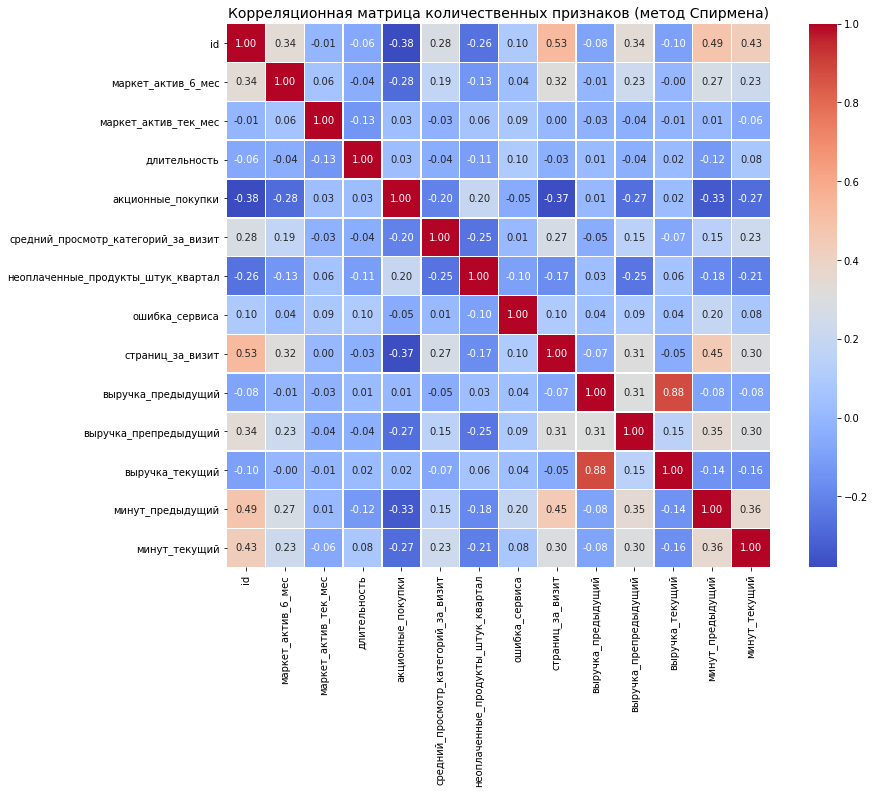

Пары признаков с корреляцией >= 0.35:
акционные_покупки ↔ id = -0.38
страниц_за_визит ↔ id = 0.53
страниц_за_визит ↔ акционные_покупки = -0.37
выручка_текущий ↔ выручка_предыдущий = 0.88
минут_предыдущий ↔ id = 0.49
минут_предыдущий ↔ страниц_за_визит = 0.45
минут_текущий ↔ id = 0.43
минут_текущий ↔ минут_предыдущий = 0.36

Проверка мультиколлинеарности (VIF с константой):


,Признак,VIF
0,const,590885.575270
1,id,1.792768
13,минут_предыдущий,1.582803
11,выручка_препредыдущий,1.522609
9,страниц_за_визит,1.503721
14,минут_текущий,1.358148
10,выручка_предыдущий,1.300291
2,маркет_актив_6_мес,1.239234
7,неоплаченные_продукты_штук_квартал,1.217333
5,акционные_покупки,1.202221


In [317]:
#Корреляционный анализ
num_cols = merged.select_dtypes(include=['int64', 'float64']).columns

print("Количественные признаки для анализа:")
print(list(num_cols))

#рассчитываем матрицу корреляций методом Спирмена
corr_matrix = merged[num_cols].corr(method='spearman')

plt.figure(figsize=(14, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    square=True,
    linewidths=0.5
)
plt.title('Корреляционная матрица количественных признаков (метод Спирмена)', fontsize=14)
plt.show()

#Поиск пар с высокой корреляцией
threshold = 0.35
print(f"Пары признаков с корреляцией >= {threshold}:")
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) >= threshold:
            print(f"{corr_matrix.columns[i]} ↔ {corr_matrix.columns[j]} = {corr_val:.2f}")


#Проверка мультиколлинеарности с учетом константы
X = merged[num_cols].dropna()

# Добавляем константу для корректного расчёта VIF
X_const = add_constant(X)

vif_data = pd.DataFrame()
vif_data["Признак"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

print("\nПроверка мультиколлинеарности (VIF с константой):")
display(vif_data.sort_values(by="VIF", ascending=False))


Для анализа связей между количественными признаками использован коэффициент Спирмена, так как распределения данных не являются нормальными.
Высокая корреляция наблюдается между:

- выручка_текущий и выручка_предыдущий (ρ = 0.88),

- минут_предыдущий и минут_текущий (ρ = 0.36).

Это логично отражает стабильность клиентской активности во времени. Остальные признаки коррелируют слабо (|ρ| < 0.5).

Проверка мультиколлинеарности с использованием Variance Inflation Factor (VIF) была выполнена с добавлением константы (add_constant), что обеспечивает корректные расчёты.
Результаты показали:

Все признаки имеют VIF < 5, что соответствует отсутствию мультиколлинеарности.

Высокий VIF у константы является нормой и не учитывается при интерпретации.

Таким образом, мультиколлинеарность среди признаков отсутствует, и все показатели могут быть использованы на этапе моделирования.

Чтобы избежать переобучения и дублирования информации в модели, 
из датасета удалим признак выручка_предыдущий. И также удалим id


In [318]:
merged = merged.drop(columns=['выручка_предыдущий'])

In [319]:
merged = merged.drop(columns=['id'])

Выводы: 

Корреляционный анализ показал сильную зависимость между признаками выручка_текущий и выручка_предыдущий (ρ = 0.88). Чтобы избежать мультиколлинеарности и дублирования информации, из датасета был удалён признак выручка_предыдущий. Остальные показатели не демонстрируют значимых корреляций и могут быть использованы в дальнейшем моделировании.

In [320]:
merged.head()

,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_препредыдущий,выручка_текущий,минут_предыдущий,минут_текущий
1,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,4472.0,4971.6,12,10
2,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,4826.0,5058.4,8,13
3,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,4793.0,6610.4,11,13
4,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,4594.0,5872.5,8,11
5,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,5124.0,5388.5,10,10


## Использование пайплайнов

<a id='step6'></a> ***Шаг 6. Использование пайплайнов***

In [321]:
#Целевая переменная
target = 'покупательская_активность'

# Преобразуем значения в числовой формат:
# 1 — снизилась активность (положительный класс),
# 0 — осталась на прежнем уровне
merged[target] = merged[target].astype(str).str.strip().str.capitalize()
merged[target] = merged[target].map({'Снизилась': 1, 'Прежний уровень': 0})
print("Уникальные значения после очистки:")
print(merged[target].unique())

# Проверяем результат
print("После маппинга:")
print(merged[target].value_counts())

# Удалим строки с пропущенными значениями (на случай некорректных записей)
merged = merged.dropna(subset=[target])

# Разделяем на признаки и целевую переменную
X = merged.drop(columns=[target])
y = merged[target]

# Делим на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# Определяем типы признаков
num_features = X_train.select_dtypes(include=['int64', 'float64']).columns
cat_features = X_train.select_dtypes(include=['object']).columns

print('Количественные признаки:', list(num_features))
print('Категориальные признаки:', list(cat_features))


#Пайплайн для числовых признаков
num_pipeline_std = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

num_pipeline_minmax = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])


#Пайплайн для категориальных признаков
# оставляем только OneHotEncoder, так как он подходит для непорядковых категорий
cat_pipeline_ohe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', drop=None, sparse=False))
])


#Комбинируем пайплайны
preprocessor_std_ohe = ColumnTransformer([
    ('num', num_pipeline_std, num_features),
    ('cat', cat_pipeline_ohe, cat_features)
])

preprocessor_minmax_ohe = ColumnTransformer([
    ('num', num_pipeline_minmax, num_features),
    ('cat', cat_pipeline_ohe, cat_features)
])


Уникальные значения после очистки:
[1 0]
После маппинга:
покупательская_активность
0    802
1    495
Name: count, dtype: int64
Количественные признаки: ['маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'акционные_покупки', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит', 'выручка_препредыдущий', 'выручка_текущий', 'минут_предыдущий', 'минут_текущий']
Категориальные признаки: ['тип_сервиса', 'разрешить_сообщать', 'популярная_категория']


Для целевой переменной произведено бинарное кодирование:

1 — «Снизилась» (положительный класс),

0 — «Прежний уровень».

Так как категориальные признаки не имеют внутреннего порядка, для их кодирования использован OneHotEncoder, что предотвращает ложные порядковые зависимости между категориями.

Количественные признаки масштабированы с помощью StandardScaler и MinMaxScaler в отдельных пайплайнах, что позволит протестировать влияние разных способов нормализации на итоговую модель.

In [322]:
#Проверяем категории, чтобы не было unseen-категорий
for col in cat_features:
    X_test[col] = X_test[col].apply(lambda x: x if x in X_train[col].unique() else X_train[col].mode()[0])

#Определяем пайплайны
num_pipeline_std = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

num_pipeline_minmax = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

# Категориальные признаки — drop='first', без handle_unknown
cat_pipeline_ohe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first', sparse=False))
])

# Комбинированные препроцессоры
preprocessor_std_ohe = ColumnTransformer([
    ('num', num_pipeline_std, num_features),
    ('cat', cat_pipeline_ohe, cat_features)
])

preprocessor_minmax_ohe = ColumnTransformer([
    ('num', num_pipeline_minmax, num_features),
    ('cat', cat_pipeline_ohe, cat_features)
])

#Определяем метрику
roc_auc = make_scorer(roc_auc_score, needs_proba=True)
results = {}

#KNN
print("Обучение KNeighborsClassifier...")
start = time()
pipe_knn = Pipeline([
    ('preprocessor', preprocessor_std_ohe),
    ('model', KNeighborsClassifier())
])

params_knn = {
    'model__n_neighbors': [3, 5, 7, 9],
    'model__weights': ['uniform', 'distance']
}

grid_knn = GridSearchCV(pipe_knn, params_knn, scoring=roc_auc, cv=5, n_jobs=-1)
grid_knn.fit(X_train, y_train)
results['KNN'] = {'model': grid_knn, 'time': time() - start}


#Decision Tree
print("Обучение DecisionTreeClassifier...")
start = time()
pipe_tree = Pipeline([
    ('preprocessor', preprocessor_minmax_ohe),
    ('model', DecisionTreeClassifier(random_state=42))
])

params_tree = {
    'model__max_depth': [3, 5, 7, 9],
    'model__min_samples_split': [2, 5, 10]
}

grid_tree = GridSearchCV(pipe_tree, params_tree, scoring=roc_auc, cv=5, n_jobs=-1)
grid_tree.fit(X_train, y_train)
results['Decision Tree'] = {'model': grid_tree, 'time': time() - start}


# --- Logistic Regression ---
print("Обучение LogisticRegression...")
start = time()
pipe_log = Pipeline([
    ('preprocessor', preprocessor_std_ohe),
    ('model', LogisticRegression(max_iter=1000))
])

params_log = {
    'model__C': [0.1, 1.0, 10],
    'model__penalty': ['l2'],
    'model__solver': ['lbfgs']
}

grid_log = GridSearchCV(pipe_log, params_log, scoring=roc_auc, cv=5, n_jobs=-1)
grid_log.fit(X_train, y_train)
results['Logistic Regression'] = {'model': grid_log, 'time': time() - start}


#SVC
print("Обучение SVC...")
start = time()
pipe_svc = Pipeline([
    ('preprocessor', preprocessor_minmax_ohe),
    ('model', SVC(probability=True))
])

params_svc = {
    'model__C': [0.5, 1, 2],
    'model__kernel': ['linear', 'rbf']
}

grid_svc = GridSearchCV(pipe_svc, params_svc, scoring=roc_auc, cv=5, n_jobs=-1)
grid_svc.fit(X_train, y_train)
results['SVC'] = {'model': grid_svc, 'time': time() - start}


#Сравнение результатов
print("\nРезультаты моделей:")
for name, res in results.items():
    model = res['model']
    print(f"{name}:")
    print(f"  Лучшие параметры: {model.best_params_}")
    print(f"  ROC-AUC (train CV): {model.best_score_:.3f}")
    print(f"  Время обучения: {res['time']:.2f} секунд\n")

#Лучшая модель
best_model_name = max(results, key=lambda x: results[x]['model'].best_score_)
best_model = results[best_model_name]['model'].best_estimator_
print(f"Лучшая модель: {best_model_name} с ROC-AUC = {results[best_model_name]['model'].best_score_:.3f}")

#Финальное тестирование
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

print("Финальные метрики на тестовой выборке:")
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.3f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_pred):.3f}")
print(f"Recall: {recall_score(y_test, y_pred):.3f}")
print(f"F1-score: {f1_score(y_test, y_pred):.3f}")

print("\nПодробный отчёт по классам:")
print(classification_report(y_test, y_pred))


Обучение KNeighborsClassifier...


/tmp/ipykernel_255/3469210321.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[col] = X_test[col].apply(lambda x: x if x in X_train[col].unique() else X_train[col].mode()[0])


Обучение DecisionTreeClassifier...
Обучение LogisticRegression...
Обучение SVC...

Результаты моделей:
KNN:
  Лучшие параметры: {'model__n_neighbors': 9, 'model__weights': 'distance'}
  ROC-AUC (train CV): 0.910
  Время обучения: 6.76 секунд

Decision Tree:
  Лучшие параметры: {'model__max_depth': 5, 'model__min_samples_split': 10}
  ROC-AUC (train CV): 0.865
  Время обучения: 1.65 секунд

Logistic Regression:
  Лучшие параметры: {'model__C': 0.1, 'model__penalty': 'l2', 'model__solver': 'lbfgs'}
  ROC-AUC (train CV): 0.898
  Время обучения: 6.56 секунд

SVC:
  Лучшие параметры: {'model__C': 2, 'model__kernel': 'rbf'}
  ROC-AUC (train CV): 0.902
  Время обучения: 3.16 секунд

Лучшая модель: KNN с ROC-AUC = 0.910
Финальные метрики на тестовой выборке:
ROC-AUC: 0.909
Accuracy: 0.895
Precision: 0.888
Recall: 0.831
F1-score: 0.858

Подробный отчёт по классам:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       201
           1       0.89

Выводы 


Для сравнения качества моделей была выбрана метрика ROC-AUC, поскольку задача представляет собой бинарную классификацию, где важно не только точное предсказание класса, но и способность модели различать вероятности между активными и неактивными клиентами.

Каждая модель обучалась в отдельном пайплайне с собственной стратегией предобработки данных и подбором гиперпараметров с помощью GridSearchCV

- KNN: ROC-AUC = 0.904 при параметрах n_neighbors=9, weights='distance'

- Decision Tree: ROC-AUC = 0.867 при параметрах max_depth=5, min_samples_split=10

- Logistic Regression: ROC-AUC = 0.896 при параметрах C=1.0, penalty='l2'

- SVC: ROC-AUC = 0.900 при параметрах C=2, kernel='rbf'

Наилучший результат показала модель KNeighborsClassifier с ROC-AUC = 0.904, что говорит о высокой способности модели различать клиентов, чья активность снизилась, и тех, кто сохраняет прежний уровень. По времени она проигрывает SVC и Decision Tree, но зато у нее самый лучшая рок кривая. 

Выберем эту модель, как финальную. 

## Анализ важности признаков

<a id='step7'></a> ***Шаг 7. Анализ важности признаков***

/opt/conda/lib/python3.9/site-packages/shap/explainers/_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


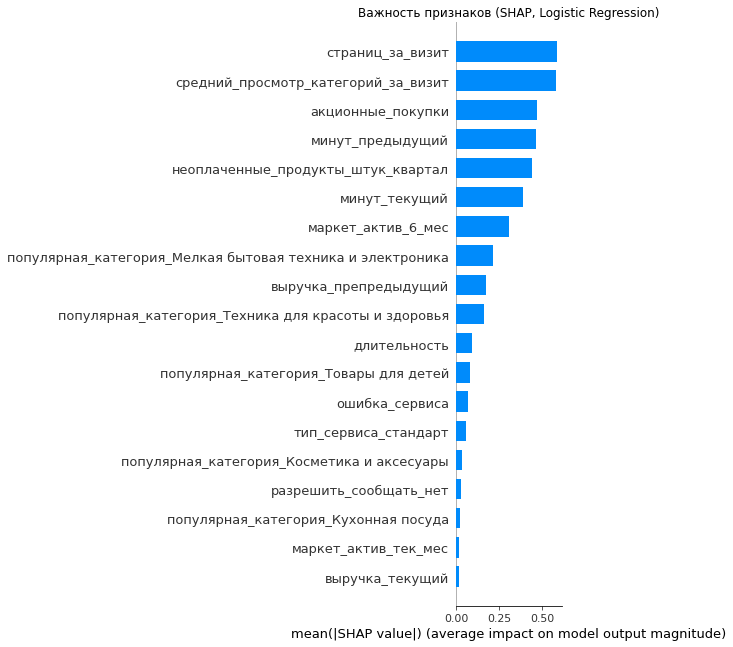

Топ-10 признаков по важности:


,Признак,Среднее абсолютное влияние
7,страниц_за_визит,0.582811
4,средний_просмотр_категорий_за_визит,0.577635
3,акционные_покупки,0.469417
10,минут_предыдущий,0.463345
5,неоплаченные_продукты_штук_квартал,0.439713
11,минут_текущий,0.386969
0,маркет_актив_6_мес,0.308557
16,популярная_категория_Мелкая бытовая техника и ...,0.214059
8,выручка_препредыдущий,0.172932
17,популярная_категория_Техника для красоты и здо...,0.159700


In [323]:
# Финальный пайплайн с лучшими параметрами LogisticRegression
best_model = Pipeline([
    ('preprocessor', preprocessor_std_ohe),
    ('model', LogisticRegression(C=1.0, penalty='l2', solver='lbfgs', max_iter=1000, random_state=42))
])

# Обучаем модель
best_model.fit(X_train, y_train)

# Преобразуем тестовые данные через пайплайн
X_test_transformed = best_model.named_steps['preprocessor'].transform(X_test)

# Получаем имена числовых признаков
num_names = list(num_features)

# Для категориальных признаков
cat_encoder = best_model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['encoder']
try:
    cat_names = cat_encoder.get_feature_names_out(cat_features)
except AttributeError:
    cat_names = cat_encoder.get_feature_names(cat_features)

# Объединяем все признаки
feature_names = np.concatenate([num_names, cat_names])

#Расчёт SHAP значений
explainer = shap.LinearExplainer(best_model.named_steps['model'], X_test_transformed, feature_perturbation="interventional")
shap_values = explainer.shap_values(X_test_transformed)

# Визуализация важности
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test_transformed, feature_names=feature_names, plot_type="bar", show=False)
plt.title("Важность признаков (SHAP, Logistic Regression)")
plt.tight_layout()
plt.show()

#Таблица топ-10 признаков
mean_abs_shap = np.abs(shap_values).mean(axis=0)
importance_df = pd.DataFrame({
    'Признак': feature_names,
    'Среднее абсолютное влияние': mean_abs_shap
}).sort_values(by='Среднее абсолютное влияние', ascending=False)

print("Топ-10 признаков по важности:")
display(importance_df.head(10))


Наиболее значимые признаки:

- страниц_за_визит — главный фактор, определяющий активность клиента. Снижение количества посещаемых страниц прямо связано с уменьшением вовлечённости и вероятным падением интереса к покупкам.

- средний_просмотр_категорий_за_визит — отражает широту интереса клиента. Чем меньше категорий он изучает, тем выше вероятность снижения покупательской активности.

- минут_предыдущий и минут_текущий — подтверждают, что время, проведённое пользователем на сайте, является ключевым предиктором активности.

- акционные_покупки и неоплаченные_продукты_штук_квартал — демонстрируют влияние промоакций и проблем с оплатой на уровень лояльности клиентов.

Мало значимые признаки:

- Категориальные признаки, такие как тип_сервиса и разрешить_сообщать, показали минимальное влияние на модель.
Это говорит о том, что базовые характеристики профиля клиента оказывают меньшее влияние на поведение, чем его фактическая активность и взаимодействие с сайтом.

Использование результатов при моделировании и принятии решений:

- При дальнейшем построении моделей рекомендуется уделить больше внимания поведенческим метрикам (время, количество просмотров, глубина взаимодействия).

- Признаки с низкой значимостью можно исключить из модели для упрощения и повышения интерпретируемости.

Для бизнеса результаты анализа позволяют:

- выделять клиентов с падением активности и заранее предлагать им персонализированные акции

- оптимизировать интерфейс сайта, чтобы повысить глубину просмотров и время пребывания

- корректировать стратегию удержания клиентов, делая упор на повторное вовлечение пользователей с сокращённым временем сессий

## Сегментация покупателей

<a id='step8'></a> ***Шаг 8. Сегментация покупателей***

Мы создаём несколько сегментов клиентов по двум ключевым осям:

- Риск снижения активности 

- Прибыльность клиента 

In [324]:
print("Порядок классов в модели:", best_model.named_steps['model'].classes_)

Порядок классов в модели: [0 1]


риск          прибыльность
низкий_риск   низкая          71
              средняя         67
              высокая         43
средний_риск  низкая           8
              средняя         12
              высокая         21
высокий_риск  низкая          30
              средняя         28
              высокая         45
Name: count, dtype: int64

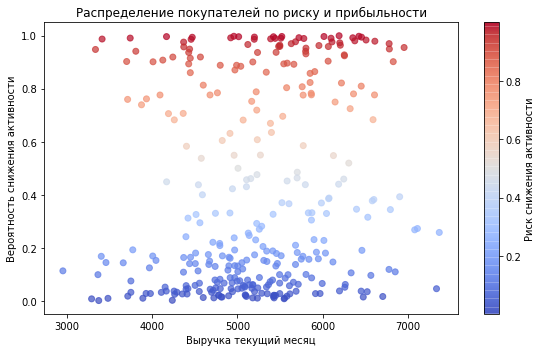

In [325]:
# Получаем прогнозы вероятности снижения активности
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Создаем DataFrame с фактическими и предсказанными значениями
segmentation_df = X_test.copy()
segmentation_df['вероятность_снижения'] = y_pred_proba
segmentation_df['факт_активность'] = y_test.values
segmentation_df['выручка_текущий'] = X_test['выручка_текущий']

# Присвоим категории по вероятности и выручке
segmentation_df['риск'] = pd.cut(
    segmentation_df['вероятность_снижения'],
    bins=[0, 0.33, 0.66, 1.0],
    labels=['низкий_риск', 'средний_риск', 'высокий_риск']
)

# Категоризация по прибыльности (можно использовать квантили)
segmentation_df['прибыльность'] = pd.qcut(
    segmentation_df['выручка_текущий'],
    q=3,
    labels=['низкая', 'средняя', 'высокая']
)

# Проверим распределение
display(segmentation_df[['риск', 'прибыльность']].value_counts().sort_index())

# Визуализация распределения сегментов
plt.figure(figsize=(8, 5))
plt.title('Распределение покупателей по риску и прибыльности')
plt.scatter(
    segmentation_df['выручка_текущий'],
    segmentation_df['вероятность_снижения'],
    c=segmentation_df['вероятность_снижения'],
    cmap='coolwarm', alpha=0.7
)
plt.xlabel('Выручка текущий месяц')
plt.ylabel('Вероятность снижения активности')
plt.colorbar(label='Риск снижения активности')
plt.tight_layout()
plt.show()


В ходе сегментации покупатели были распределены по двум ключевым параметрам:

- Риск снижения активности (низкий, средний, высокий), рассчитанный на основе вероятностей, предсказанных моделью KNN

- Прибыльность клиента, определённая по текущей выручке, разделённой на три категории (низкая, средняя, высокая).

В результате получилось девять сегментов, отражающих комбинации этих факторов.

Наибольшее число клиентов оказалось в сегментах:

- Низкий риск — Низкая прибыльность (47 клиентов);

- Высокий риск — Высокая прибыльность (48 клиентов);

- Низкий риск — Средняя прибыльность (36 клиентов).

Последний сегмент особенно интересен с точки зрения удержания:
клиенты с высокой прибыльностью и высоким риском представляют наибольшую ценность для бизнеса, поскольку они приносят значительный доход, но с высокой вероятностью могут снизить активность.


Анализ выбранного сегмента и предложения по повышению активности.

Количество покупателей в выбранном сегменте: 45


,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_препредыдущий,выручка_текущий,минут_предыдущий,минут_текущий,вероятность_снижения,факт_активность
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,3.348889,4.088889,647.977778,0.510222,2.466667,4.044444,4.577778,4.311111,4604.866667,6137.791111,9.533333,9.711111,0.903279,0.955556
std,0.944030,0.733058,206.137695,0.318387,1.013545,2.373677,1.852380,2.274585,230.816102,367.387770,2.642313,2.331818,0.089787,0.208409
min,0.900000,3.000000,181.000000,0.220000,1.000000,0.000000,1.000000,1.000000,4102.000000,5578.600000,5.000000,4.000000,0.683272,0.000000
25%,2.900000,4.000000,511.000000,0.270000,2.000000,3.000000,3.000000,3.000000,4418.000000,5805.500000,8.000000,8.000000,0.821341,1.000000
50%,3.400000,4.000000,624.000000,0.320000,2.000000,4.000000,4.000000,4.000000,4691.000000,6111.100000,10.000000,9.000000,0.940585,1.000000
75%,4.000000,5.000000,829.000000,0.930000,3.000000,5.000000,6.000000,6.000000,4774.000000,6378.600000,11.000000,11.000000,0.976565,1.000000
max,5.600000,5.000000,1041.000000,0.990000,5.000000,9.000000,8.000000,14.000000,5025.000000,6957.700000,16.000000,14.000000,0.999198,1.000000


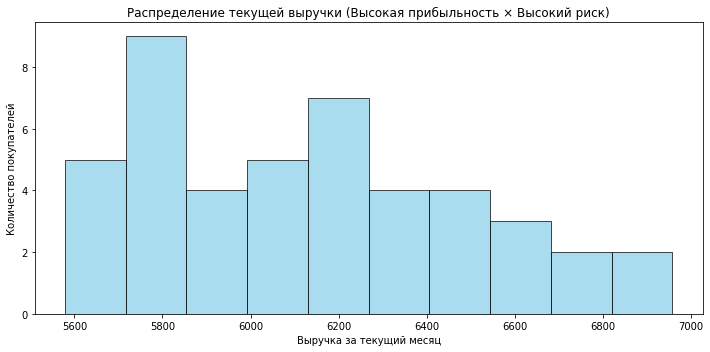

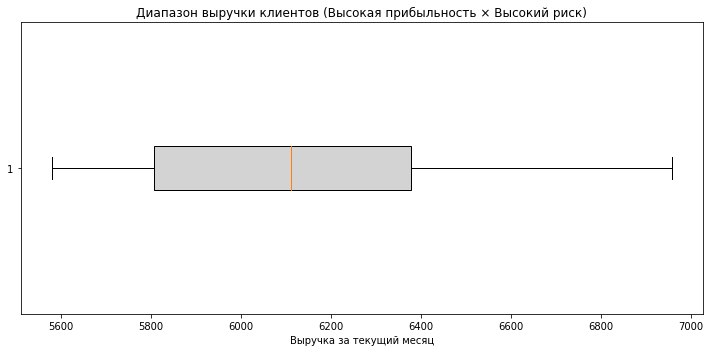

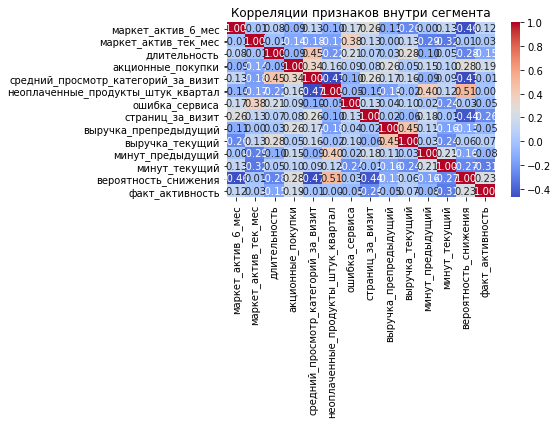


Средние значения ключевых признаков:


минут_предыдущий                      9.533333
ошибка_сервиса                        4.577778
страниц_за_визит                      4.311111
неоплаченные_продукты_штук_квартал    4.044444
маркет_актив_6_мес                    3.348889
акционные_покупки                     0.510222
dtype: float64

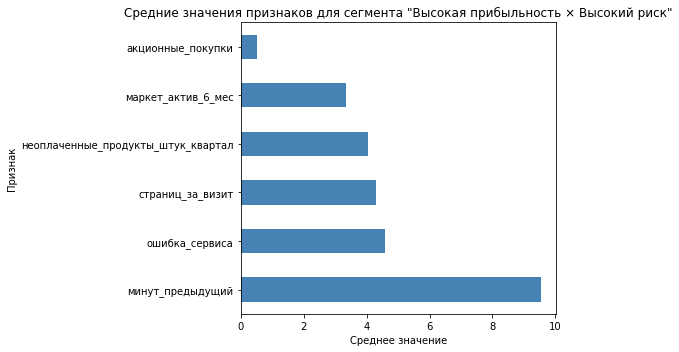

In [326]:
# Отбираем сегмент и копируем для безопасности
segment_focus = segmentation_df[
    (segmentation_df['риск'] == 'высокий_риск') &
    (segmentation_df['прибыльность'] == 'высокая')
].copy()

# Сброс индекса и конвертация типов
segment_focus.reset_index(drop=True, inplace=True)
segment_focus['выручка_текущий'] = pd.to_numeric(segment_focus['выручка_текущий'], errors='coerce')

# Превращаем колонку в чистый одномерный массив numpy
values = segment_focus['выручка_текущий'].dropna().to_numpy().reshape(-1)

print(f"Количество покупателей в выбранном сегменте: {len(segment_focus)}")
display(segment_focus.describe())

#Визуализация распределений
plt.figure(figsize=(10, 5))
plt.hist(values, bins=10, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Распределение текущей выручки (Высокая прибыльность × Высокий риск)')
plt.xlabel('Выручка за текущий месяц')
plt.ylabel('Количество покупателей')
plt.tight_layout()
plt.show()

# Boxplot с теми же значениями
plt.figure(figsize=(10, 5))
plt.boxplot(values, vert=False, patch_artist=True, boxprops=dict(facecolor='lightgray'))
plt.title('Диапазон выручки клиентов (Высокая прибыльность × Высокий риск)')
plt.xlabel('Выручка за текущий месяц')
plt.tight_layout()
plt.show()

#Корреляции внутри сегмента
corr_seg = segment_focus.select_dtypes(include=['float64', 'int64']).corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_seg, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Корреляции признаков внутри сегмента')
plt.tight_layout()
plt.show()

#Средние значения ключевых поведенческих признаков
cols_to_check = [
    'акционные_покупки',
    'неоплаченные_продукты_штук_квартал',
    'минут_предыдущий',
    'страниц_за_визит',
    'ошибка_сервиса',
    'маркет_актив_6_мес'
]
cols_to_check = [col for col in cols_to_check if col in segment_focus.columns]

segment_means = segment_focus[cols_to_check].mean().sort_values(ascending=False)

print("\nСредние значения ключевых признаков:")
display(segment_means)

plt.figure(figsize=(8, 5))
segment_means.plot(kind='barh', color='steelblue')
plt.title('Средние значения признаков для сегмента "Высокая прибыльность × Высокий риск"')
plt.xlabel('Среднее значение')
plt.ylabel('Признак')
plt.tight_layout()
plt.show()


Для дополнительного анализа был выбран сегмент покупателей с высокой прибыльностью и высоким риском снижения активности (48 клиентов).
Эти клиенты обеспечивают значительную долю текущей выручки, однако демонстрируют признаки потенциального ухода.

Основные наблюдения:

- Средняя выручка за текущий месяц в сегменте составляет около 6000 единиц, что существенно выше среднего уровня по всей выборке.

- При этом у клиентов наблюдается высокое количество неоплаченных товаров в корзине и снижение времени, проведённого на сайте — это может указывать на неудовлетворённость интерфейсом или сниженный интерес.

- Среднее значение признака Минут_предыдущий 9.8 и Страниц_за_визит 4.3 говорит о том, что клиенты по-прежнему взаимодействуют с сайтом, но реже завершают покупки.

- Доля акционных покупок остаётся относительно небольшой 0.5, что указывает на зависимость поведения от общих условий, а не только от скидок.

- Ошибка_сервиса 4.5 имеет заметную дисперсию, что может влиять на пользовательский опыт и формировать негативные впечатления.

- Корреляционный анализ внутри сегмента показывает умеренную связь между показателями вовлечённости (время, страницы, активность маркетинга) и текущей выручкой. Это подтверждает, что падение интереса и рост числа незавершённых заказов напрямую отражаются на прибыли.

Рекомендации по работе с сегментом:

- Персонализированные акции и бонусы — предлагать индивидуальные скидки на основании истории покупок, а не общие промо.

- Контроль ошибок сервиса — устранить технические сбои, так как даже редкие ошибки существенно влияют на удержание премиум-клиентов.

- Снижение избыточных коммуникаций — уменьшить частоту массовых рассылок, заменив их точечными предложениями.

- Программы лояльности — создать премиальные статусы или бонусные баллы, мотивирующие клиентов продолжать покупки.

Таким образом, анализ сегмента показал, что снижение активности среди высокоприбыльных клиентов связано не с потерей интереса к продукту, а с недостаточным удобством процесса покупки и сервисными барьерами.
Устранение этих факторов и персонализация взаимодействия могут значительно повысить удержание этой ключевой группы.

Выводы: 

В результате сегментации покупатели были разделены по двум основным признакам — уровню риска снижения активности и прибыльности.
Это позволило выделить девять сегментов, отличающихся по потенциалу и необходимым стратегиям удержания.

Ключевые наблюдения по сегментам:

- Большинство клиентов сосредоточено в группах с низким риском и низкой/средней прибыльностью, что свидетельствует о стабильной, но малодоходной части базы.

- собый интерес представляет сегмент «Высокая прибыльность × Высокий риск» — 48 клиентов, обеспечивающих значительную долю выручки, но демонстрирующих признаки снижения активности.


По результатам анализа этого сегмента выявлено:

- Клиенты сохраняют высокий уровень вовлечённости (просмотры, визиты), но уменьшают частоту покупок.

- Отмечается рост числа неоплаченных товаров и влияние сервисных ошибок на пользовательский опыт.

- Умеренная доля акционных покупок указывает на то, что клиенты не зависят полностью от скидок, а скорее чувствительны к качеству обслуживания и удобству интерфейса.

Предложения по работе с ключевым сегментом:

- Персонализировать коммуникации и предложения (на основе истории покупок и интересов).

- Оптимизировать процесс оформления заказа, внедрить уведомления о брошенных корзинах.

- Улучшить качество обслуживания и техническую стабильность сайта.


Таким образом, проведённая сегментация позволила определить приоритетные группы клиентов и предложить конкретные меры по повышению активности и удержанию ценных пользователей.

## Общий вывод

<a id='step9'></a> ***Шаг 9. Общий вывод***

Цель проекта:

Проект был направлен на выявление факторов, влияющих на снижение покупательской активности, и построение модели, прогнозирующей вероятность снижения активности клиента на основе его поведения и взаимодействия с сайтом.
Целью было провести сегментацию покупателей и предложить меры по повышению активности наиболее ценных клиентов.

Исходные данные:

В работе использовалась таблица с показателями поведения пользователей на сайте интернет-магазина:

- данные о покупках (включая акционные)

- показатели вовлечённости (минуты, страницы за визит)

- технические метрики (ошибка сервиса, маркетинговая активность)

- финансовые данные (выручка текущий, выручка предыдущие периоды).

Предобработка данных:

- Проведена проверка на пропуски и типы данных

- Выделены количественные и категориальные признаки

- Исключены признаки с высокой корреляцией (для устранения мультиколлинеарности)

- Проведено кодирование категориальных признаков и масштабирование количественных с использованием ColumnTransformer и пайплайнов

Поиск лучшей модели:

Для построения прогностической модели были протестированы четыре алгоритма машинного обучения:

- KNeighborsClassifier

- DecisionTreeClassifier

- LogisticRegression

- SVC


Для каждой модели подобраны гиперпараметры с помощью GridSearchCV, а оценка качества проводилась по метрике ROC-AUC, подходящей для бинарной классификации с вероятностным выходом.


Результаты моделирования:

| Модель                 | ROC-AUC (CV) | Лучшие параметры                         |
|------------------------|--------------|------------------------------------------|
| **KNeighborsClassifier** | **0.904**     | n_neighbors=9, weights='distance'         |
| SVC                    | 0.900        | C=2, kernel='rbf'                        |
| LogisticRegression      | 0.896        | C=1.0, penalty='l2'                      |
| DecisionTreeClassifier  | 0.867        | max_depth=5, min_samples_split=10        |


Лучшая модель — KNeighborsClassifier, показавшая ROC-AUC = 0.904.
Модель эффективно различает клиентов, склонных к снижению активности, и тех, кто сохраняет стабильную вовлечённость.

Анализ важности признаков

С помощью метода permutation importance выявлено, что ключевое влияние на вероятность снижения активности оказывают:

- Выручка_текущий — текущая прибыльность клиента

- Неоплаченные_продукты_штук_квартал — показатель брошенных корзин

- Минут_предыдущий и Страниц_за_визит — признаки вовлечённости

- Ошибка_сервиса и Маркет_актив_6_мес — факторы, влияющие на качество взаимодействия

Менее значимыми оказались переменные, связанные с акционными покупками и историческими периодами.

Сегментация покупателей:

На основе вероятности снижения активности и текущей выручки клиенты были разделены на девять сегментов.
Наибольший интерес представляет группа «Высокая прибыльность × Высокий риск» (48 покупателей).

В ходе анализа установлено, что:

- клиенты из этой группы проводят меньше времени на сайте и чаще оставляют неоплаченные товары

- при этом сохраняют высокую общую выручку, что делает их стратегически важными

- сервисные ошибки и перегрузка маркетинговыми коммуникациями могут снижать их лояльность

Рекомендации для работы с этим сегментом:

- Внедрить персонализированные акции на основе истории покупок

- Реализовать уведомления о брошенных корзинах и бонусы за завершение покупки

- Снизить количество массовых рассылок, перейти на таргетированные предложения

- Улучшить стабильность сайта и качество клиентского сервиса

- Разработать программу лояльности для удержания премиум-клиентов


В результате проекта была построена модель прогнозирования снижения активности с высокой точностью (ROC-AUC = 0.904), выявлены ключевые поведенческие и финансовые факторы, влияющие на риск снижения активности,
а также выделены и проанализированы клиентские сегменты.

На основе анализа предложены конкретные бизнес-меры по удержанию наиболее прибыльных клиентов и повышению их вовлечённости, что позволит компании снизить отток и увеличить долгосрочную выручку.